In [1]:
from rubix.telescope.psf.kernels import gaussian_kernel_2d

In [64]:
kernel = gaussian_kernel_2d(20,20,3.5)
print(kernel.shape)
print(kernel.sum())

(20, 20)
1.0


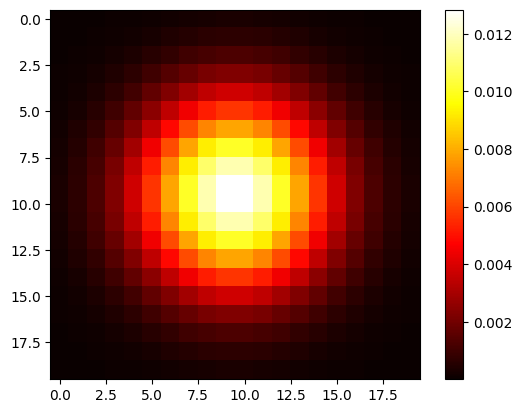

In [65]:
import matplotlib.pyplot as plt
plt.imshow(kernel, cmap='hot')
plt.colorbar()

In [69]:
import jax.numpy as jnp
from jax.scipy.signal import convolve2d
from jaxtyping import Array, Float


def _convolve_plane(plane, kernel):
    """Convolve a single plane of a datacube with a kernel."""
    return convolve2d(plane, kernel, mode="same")


def apply_psf(
    datacube: Float[Array, "n_pixel n_pixel wave_bins"], psf_kernel: Float[Array, "m n"]
) -> Float[Array, "n_pixel n_pixel wave_bins"]:
    """Apply a point spread function (PSF) to the spectral datacube.

    The PSF kernel is convolved with each spectral plane of the datacube to simulate the
    blurring effect of the telescope.


    Parameters
    ----------
    datacube : Float[Array, "n_pixel n_pixel wave_bins"]
        The spectral datacube to convolve with the PSF kernel.
    psf_kernel : Float[Array, "m n"]
        The 2D PSF kernel to apply to the datacube.

    Returns
    -------
    Float[Array, "n_pixel n_pixel wave_bins"]
        The datacube convolved with the PSF kernel.
    """
    datacube_dimensions = datacube.shape

    # Convolve each plane of the datacube with the PSF kernel
    convolved = jnp.array(
        [
            _convolve_plane(datacube[:, :, i], psf_kernel)
            for i in range(datacube_dimensions[2])
        ]
    )
    transposed = jnp.transpose(convolved, (1, 2, 0))  # Reorder to original shape

    return transposed


(50, 50, 300)


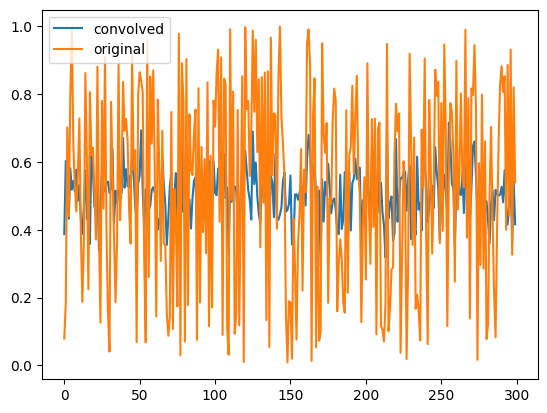

In [70]:
# Get an example Datacube
import numpy as np
import jax.numpy as jnp
datacube = np.ones((50,50,300))
# create random data
for i in range(300):
    datacube[:,:,i] = np.random.rand(50,50)

datacube = jnp.array(datacube)
convolved_datacube = apply_psf(datacube, kernel)
print(convolved_datacube.shape)

plt.plot(convolved_datacube[10,10,:], label='convolved')
plt.plot(datacube[10,10,:], label='original')
plt.legend()